### Multiple Linear Regression

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Exploring Data

In [3]:
california=fetch_california_housing()

In [4]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
type(california)

sklearn.utils._bunch.Bunch

In [6]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
california.target_names

['MedHouseVal']

### Converting raw data to DataFrame

In [8]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
features=california.feature_names

In [10]:
data=california.data

In [11]:
data[0].tolist()

[8.3252,
 41.0,
 6.984126984126984,
 1.0238095238095237,
 322.0,
 2.5555555555555554,
 37.88,
 -122.23]

In [12]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
dct={}
k=0
for i in features:
    lst=[]
    for j in data:
        lst.append(j.tolist()[k])
    dct[i]=lst
    k=k+1

In [14]:
len(data)

20640

In [15]:
df=pd.DataFrame(dct)

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
#These above all are independent features use for predicting house price

In [18]:
#These above all are independent features use for predicting house price
df['Price']=california.target

In [19]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Data Cleaning

In [20]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [21]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Price         float64
dtype: object

- MedInc      =>   median income in block group
- HouseAge    =>   median house age in block group
- AveRooms    =>   average number of rooms per household
- AveBedrms   =>   average number of bedrooms per household
- Population  =>   block group population
- AveOccup    =>   average number of household members
- Latitude    =>   block group latitude
- Longitude   =>   block group longitude

#### Finding Outliers

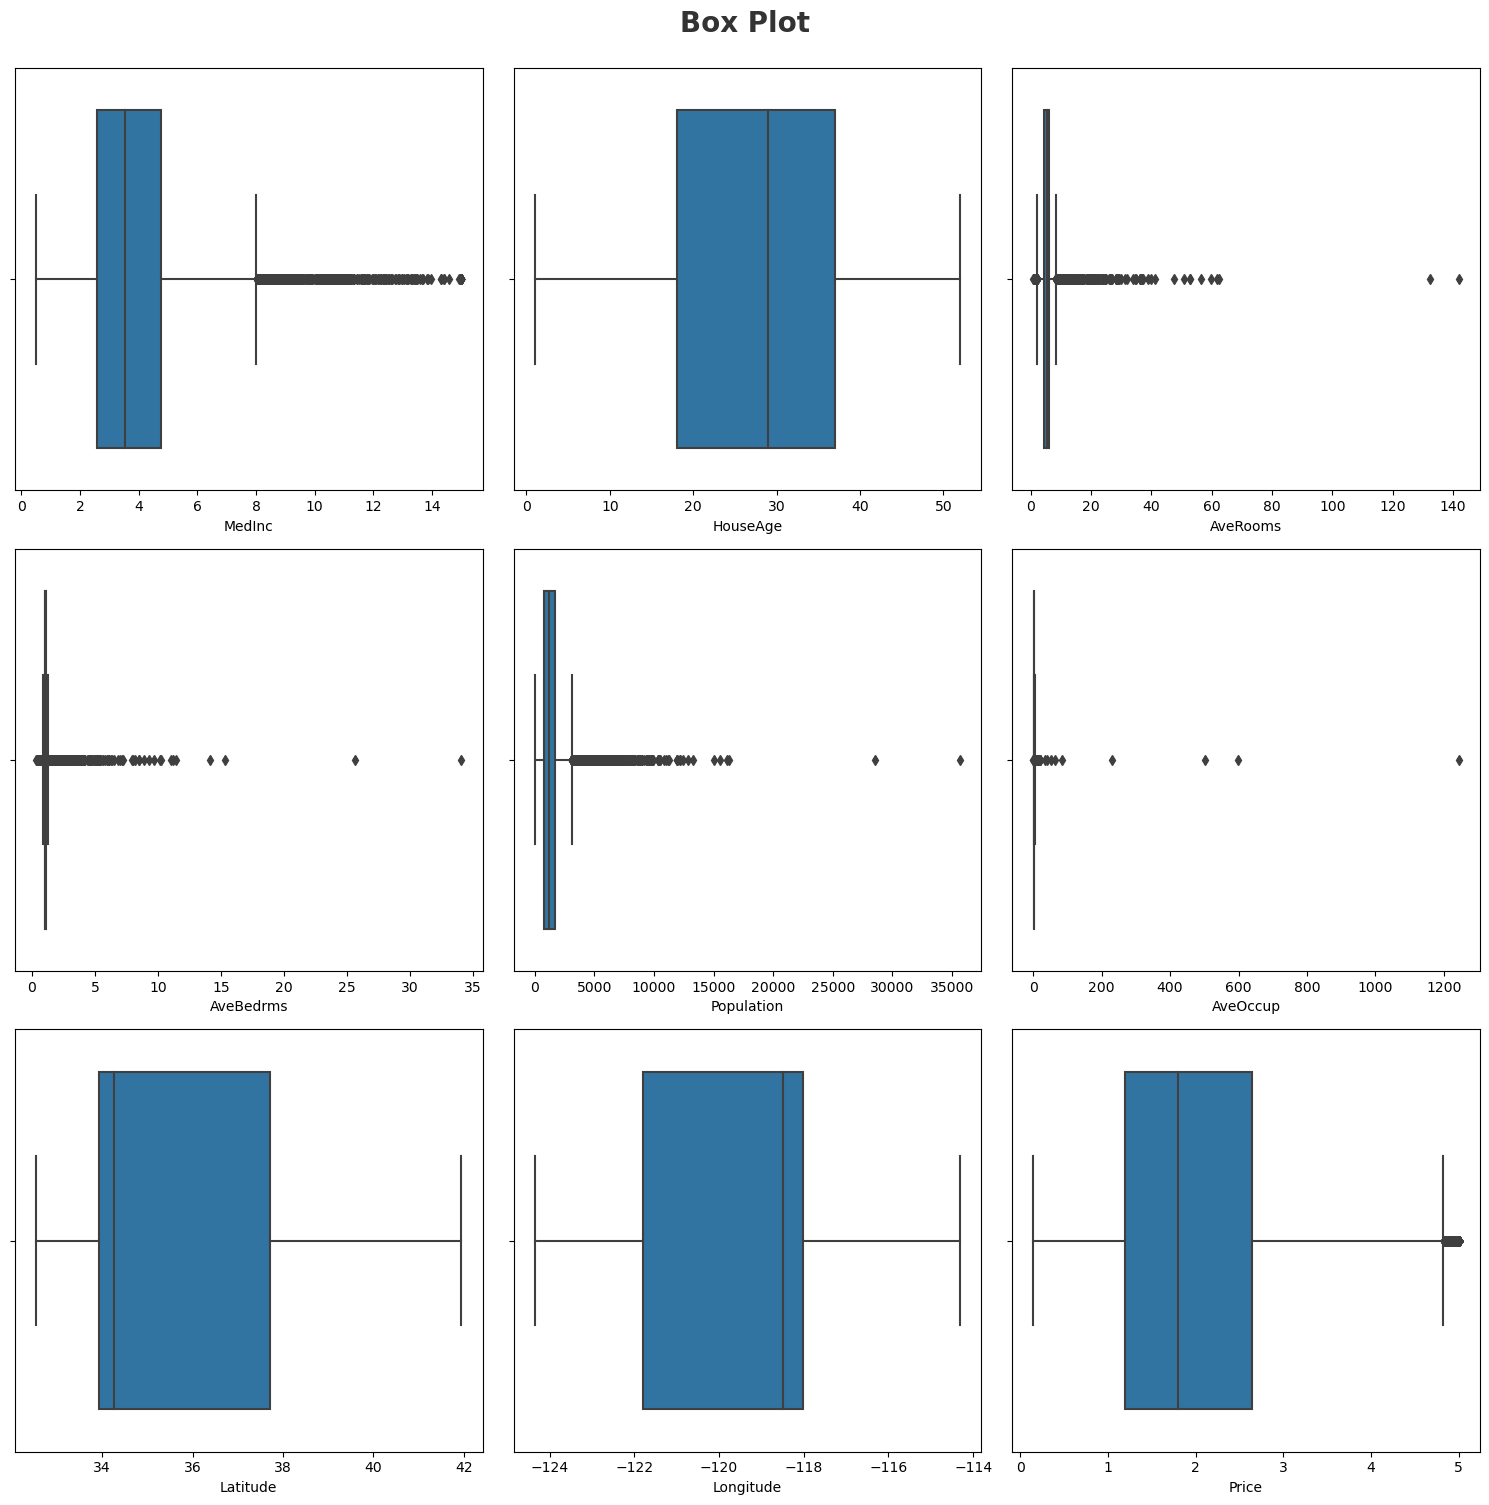

In [22]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot',fontsize=20, fontweight='bold', alpha=0.8, y=1.)
j=0
for i in df.columns:
    plt.subplot(3, 3, j+1)
    sns.boxplot(x=i,data=df)
    plt.xlabel(i)
    plt.tight_layout()
    j=j+1

In [23]:
from numpy import percentile
l=list(df.columns)
for i in l:
    lst=df[i].to_list()
    Q1,Q2,Q3 = percentile(df[i], [25, 50, 75])
    IQR=Q3-Q1
    LOWER_FENCE=Q1-(1.5*IQR)
    HIGHER_FENCE=Q3+(1.5*IQR)
    for j in range(len(lst)):
        if ((lst[j]>HIGHER_FENCE) or (lst[j]<LOWER_FENCE)):
            lst[j]=df[i].mode()[0]
    df[i]=lst

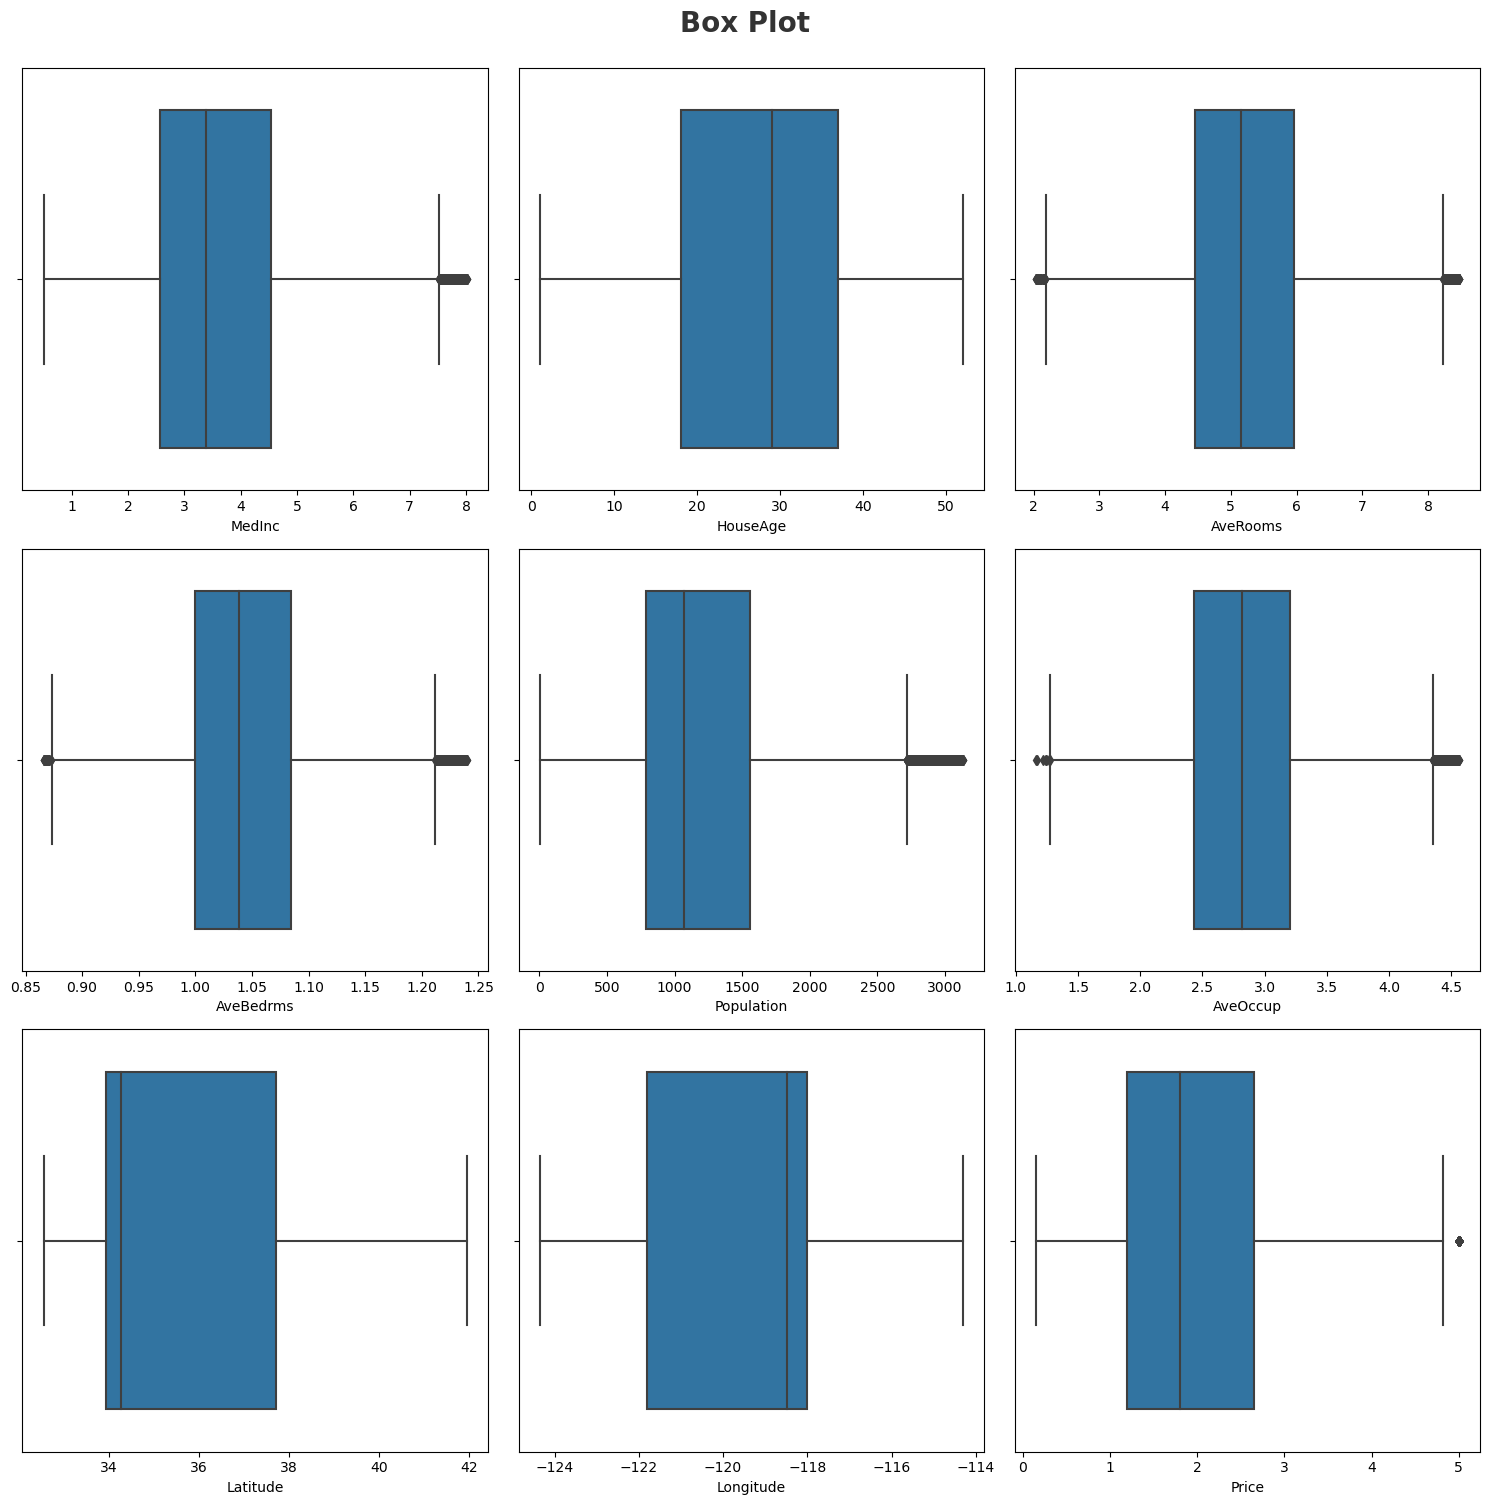

In [24]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot',fontsize=20, fontweight='bold', alpha=0.8, y=1.)
j=0
for i in df.columns:
    plt.subplot(3, 3, j+1)
    sns.boxplot(x=i,data=df)
    plt.xlabel(i)
    plt.tight_layout()
    j=j+1

### Checking Null and Duplicate Values

In [25]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [26]:
df.duplicated().sum()

0

### Normal or Non Normal Distribution

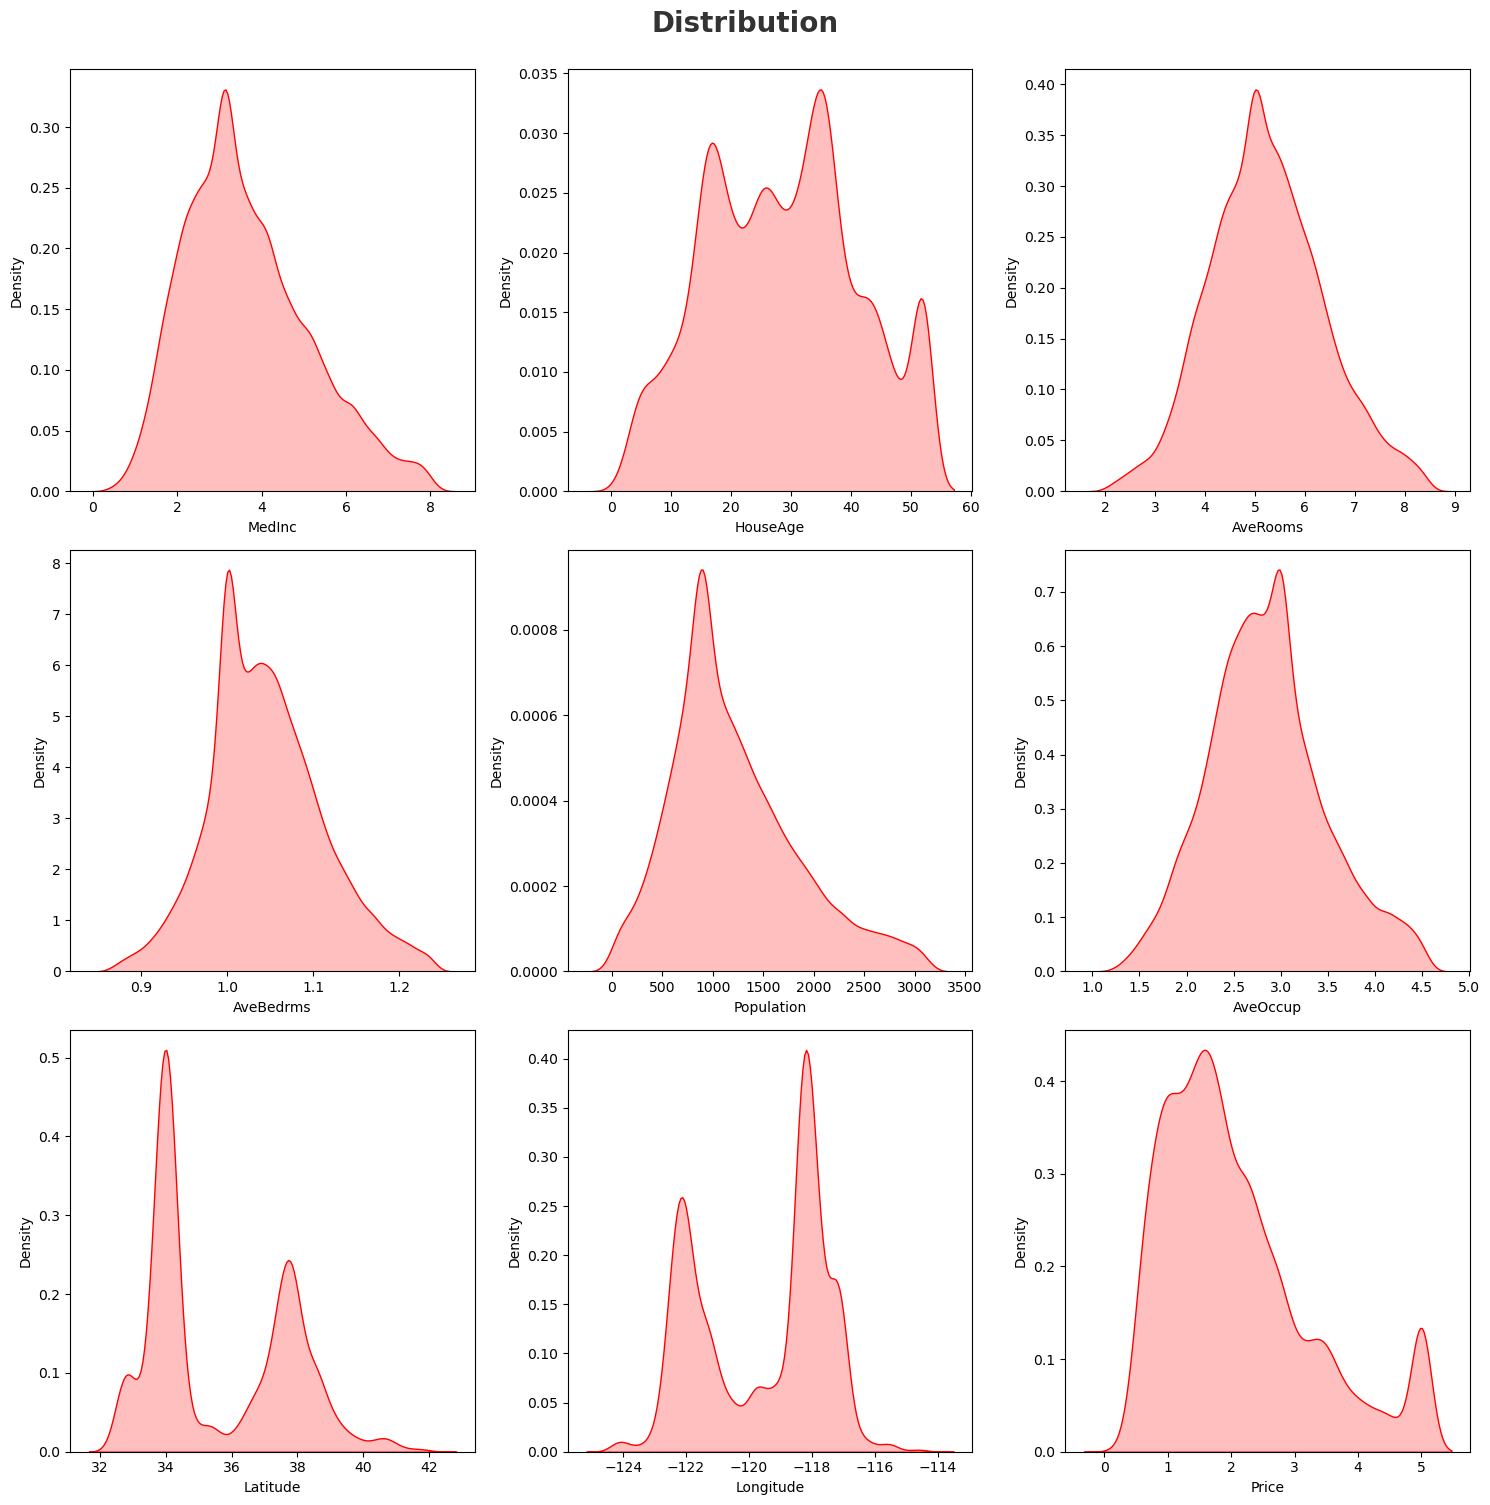

In [27]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.figure(figsize=(15, 15))
plt.suptitle('Distribution',fontsize=20, fontweight='bold', alpha=0.8, y=1.)
j=0
for i in df.columns:
    plt.subplot(3, 3, j+1)
    sns.kdeplot(x=i,shade=True, color='r',data=df)
    plt.xlabel(i)
    plt.tight_layout()
    j=j+1

In [28]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,3.1250,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,3.1250,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

### Data Statistical Information

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [31]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.639733,28.639486,5.232889,1.044825,1207.102616,2.847029,35.631861,-119.569704,2.068939
std,1.466805,12.585558,1.140359,0.064940,627.701491,0.616496,2.135952,2.003532,1.154902
min,0.499900,1.000000,2.032738,0.866013,3.000000,1.161290,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.447368,1.000000,787.000000,2.430380,33.930000,-121.800000,1.196000
50%,3.390600,29.000000,5.158471,1.038647,1072.000000,2.818868,34.260000,-118.490000,1.797000
75%,4.546100,37.000000,5.960233,1.084706,1559.000000,3.199720,37.710000,-118.010000,2.647250
max,8.011300,52.000000,8.469738,1.239521,3132.000000,4.560748,41.950000,-114.310000,5.000010


In [32]:
df.corr('spearman')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.148722,0.583348,-0.189269,0.007350,-0.031462,-0.081291,-0.003636,0.601208
HouseAge,-0.148722,1.000000,-0.208457,-0.046573,-0.182436,-0.035280,0.032440,-0.150752,0.074874
AveRooms,0.583348,-0.208457,1.000000,-0.054892,-0.084800,0.058591,0.121409,-0.057252,0.259228
AveBedrms,-0.189269,-0.046573,-0.054892,1.000000,0.129095,-0.070022,0.003097,0.001007,-0.062382
Population,0.007350,-0.182436,-0.084800,0.129095,1.000000,0.205535,-0.110074,0.097574,-0.001309
AveOccup,-0.031462,-0.035280,0.058591,-0.070022,0.205535,1.000000,-0.142154,0.175551,-0.244067
Latitude,-0.081291,0.032440,0.121409,0.003097,-0.110074,-0.142154,1.000000,-0.879203,-0.165760
Longitude,-0.003636,-0.150752,-0.057252,0.001007,0.097574,0.175551,-0.879203,1.000000,-0.069626
Price,0.601208,0.074874,0.259228,-0.062382,-0.001309,-0.244067,-0.165760,-0.069626,1.000000


<AxesSubplot: >

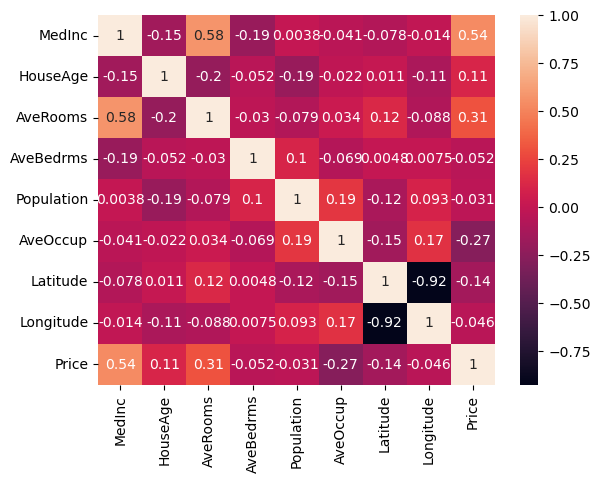

In [33]:
sns.heatmap(df.corr(),annot=True)

### Getting all Independent and Dependent Features

In [34]:
### Independent Feature
X=df.drop(['Price'], axis=1)

In [35]:
X.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.125,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,3.125,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [36]:
### Dependent Feature 
y=df['Price']

In [37]:
y.head(2)

0    4.526
1    3.585
Name: Price, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10) 
#Here test size is 0.33 means out of 100 data 66 will be used for training my model
# And 33 will be used for testing my model

In [40]:
#Total records for training my dataset
X_train.shape,y_train.shape

((13828, 8), (13828,))

In [41]:
#Total records for testing my dataset
X_test.shape,y_test.shape

((6812, 8), (6812,))

#### Standarizing the Data 
- As we can see here my input and output variables are having different units
- Also different scale that is range of my variables like population range or income range total everything is different
- Whilemy price is in dollar with different range
- Also due to standarizing my calculation will be fast as i will have my all data variables values ranging between -3 to +3

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()

- Note: Here while doing standarization Fit transform should only be done for train data
- While for test data only transform need to be done because my model should not have any information regarding my test data

In [44]:
X_train = scaler.fit_transform(X_train)

In [45]:
X_test=scaler.transform(X_test)

In [46]:
### Now training my Simple Regression Model using Linear Regresion
from sklearn.linear_model import LinearRegression

In [47]:
regressor=LinearRegression()

In [48]:
regressor.fit(X_train,y_train) #Gives slope and intercept for best fit line
#By trying all posible values

LinearRegression()

In [49]:
slope=regressor.coef_
intercept=regressor.intercept_

In [50]:
slope #Different slopes for all imdependent input variables

array([ 0.38716239,  0.12166959,  0.21430213,  0.0200985 ,  0.02451556,
       -0.30814999, -1.23963366, -1.10625048])

In [51]:
intercept #There will be always one intercept

2.0638558735898194

In [52]:
### Predicting output for train dataset

In [53]:
y_pred_test=regressor.predict(X_test)

In [54]:
y_pred_test 

array([2.24180564, 2.78885583, 2.6176799 , ..., 3.5898505 , 1.18465496,
       1.98887756])

#### Finding my minimum error that occured in creating best fit line 
- Through Various cost function
  - MSE MAE RMSE

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [56]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

In [57]:
mse,mae,rmse

(0.6596751591562384, 0.5973354662275164, 0.8122038901385775)

#### Performance Matrix (How well is my ml model predicting for new data ie Finding Accuracy of my ml model)

In [58]:
from sklearn.metrics import r2_score

#### i)R squared accuracy
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [59]:
#Calculating adjusted r2 accuracy
r2_accuracy=r2_score(y_test,y_pred_test)
r2_accuracy*100

51.531015455380945

#### ii)Adjusted r squared accuracy
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [60]:
#Calculating adjusted r2 accuracy
adjusted_r2_accuracy=1 - (1-r2_accuracy)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r2_accuracy*100

51.47401826644122

#### Predicting output for new data point 
- Here we will give our own weight as a input to get output

Text(0, 0.5, 'Test Predicted Data')

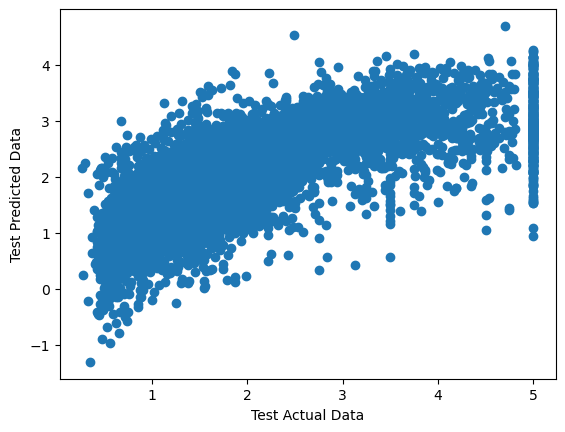

In [61]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Test Actual Data')
plt.ylabel('Test Predicted Data')

In [62]:
#As here x axis and y axis value are almost simialr for data point
#Hence i can say my ml model is very well predicting

#### Residuals

In [63]:
residuals=y_test-y_pred_test

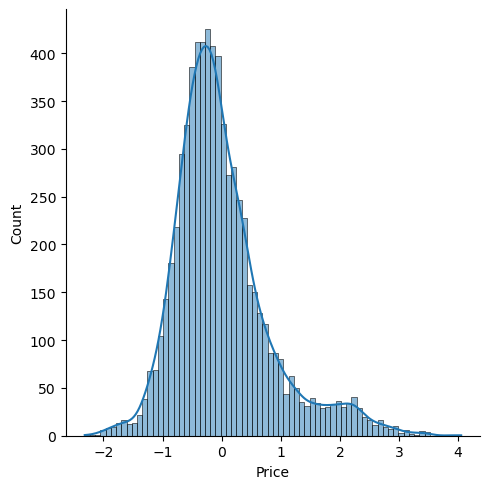

In [64]:
sns.displot(residuals,kde=True)

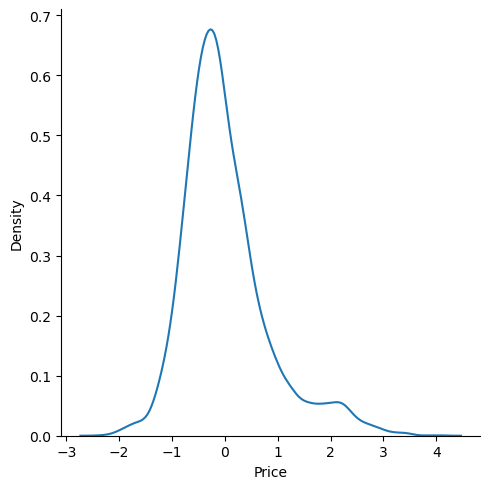

In [65]:
sns.displot(residuals,kind='kde')

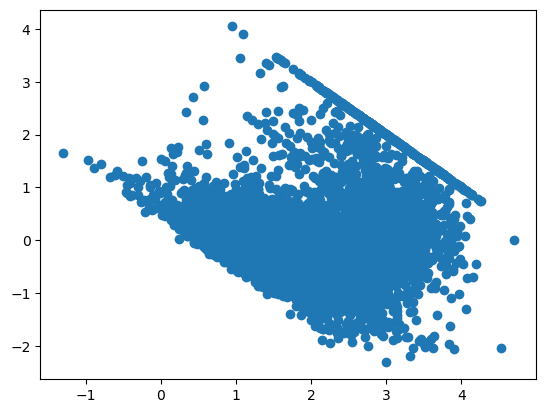

In [66]:
plt.scatter(y_pred_test,residuals)

## Pickling 
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [67]:
import pickle

In [125]:
pickle.dump(regressor,open('multipleregressor.pkl','wb'))

In [126]:
model=pickle.load(open('multipleregressor.pkl','rb'))

In [187]:
#Single input for all features price prediction
scaler=StandardScaler()
data=[[3.78],[15],[4],[2],[1000],[3],[40],[-120]]
data=scaler.fit_transform(data)
m,n=data.shape
data=data.reshape(n,m)
model.predict(data)

array([3.05868945])

In [188]:
#Multiple input for all features price prediction
scaler=StandardScaler()
data=[[3.78,12,3.69],[15,13,15],[4,3,3.5],[1.20,1.06,0.98],[1000,1200,1500],[3,3.5,2.56],[33,36,38],[-120,-118,-116]]
data=scaler.fit_transform(data)
m,n=data.shape
data=data.reshape(n,m)
model.predict(data)

array([ 2.7113824 , -1.83620766,  3.50126063])

In [178]:
X_test.shape

(6812, 8)

In [179]:
data.shape

(3, 8)